# Are some train routes more likely to experience delays than others? Visualize and proof statistically.

In [1]:
import src.data_processing.data as data
import numpy as np
import pandas as pd

KeyError: "None of [Index(['Station', 'Date'], dtype='object')] are in the [columns]"

In [105]:
trips = data.full_trips
trips[["Delay time"]].describe()

Unnamed: 0 Date of departure  Train number Relation Railway operators  \
0               0        2020-09-22            11      ICE         SNCB/NMBS   
1               1        2020-09-22            11      ICE         SNCB/NMBS   
2               2        2020-09-22            11      ICE         SNCB/NMBS   
3               3        2020-09-22            11      ICE         SNCB/NMBS   
4               4        2020-09-22            11      ICE         SNCB/NMBS   
...           ...               ...           ...      ...               ...   
72524       72524        2020-09-24         17200    EXTRA         SNCB/NMBS   
72525       72525        2020-09-24         17200    EXTRA         SNCB/NMBS   
72526       72526        2020-09-24         17200    EXTRA         SNCB/NMBS   
72527       72527        2020-09-24         17301    EXTRA         SNCB/NMBS   
72528       72528        2020-09-24         17301    EXTRA         SNCB/NMBS   

      Railway of departure Time of real arrival Time of real departure  \
0                      36N  2022-10-29 06:31:22    2022-10-29 06:33:27   
1                      36N  2022-10-29 06:36:23    2022-10-29 06:36:23   
2                      36N  2022-10-29 06:37:44    2022-10-29 06:37:44   
3                      36N  2022-10-29 06:38:39    2022-10-29 06:38:39   
4                      36N  2022-10-29 06:39:47    2022-10-29 06:39:47   
...                    ...                  ...                    ...   
72524                  130  2022-10-29 17:20:23    2022-10-29 17:20:23   
72525                  154  2022-10-29 17:27:14    2022-10-29 17:27:14   
72526                  NaN  2022-10-29 17:33:22                    NaT   
72527                  140  2022-10-29 18:57:01    2022-10-29 18:58:04   
72528                  140  2022-10-29 19:29:57    2022-10-29 19:29:57   

      Time of planned arrival Time of planned departure  \
0         2022-10-29 06:31:00       2022-10-29 06:33:00   
1         2022-10-29 06:36:00       2022-10-29 06:36:00   
2         2022-10-29 06:37:00       2022-10-29 06:37:00   
3         2022-10-29 06:38:00       2022-10-29 06:38:00   
4         2022-10-29 06:40:00       2022-10-29 06:40:00   
...                       ...                       ...   
72524     2022-10-29 17:05:00       2022-10-29 17:05:00   
72525     2022-10-29 17:17:00       2022-10-29 17:17:00   
72526     2022-10-29 17:20:00                       NaT   
72527     2022-10-29 18:55:00       2022-10-29 18:56:00   
72528     2022-10-29 19:26:00       2022-10-29 19:26:00   

                          Direction of relation Name of the stop  \
0      ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF    brussel-noord   
1      ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF       schaarbeek   
2      ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF       haren-zuid   
3      ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF           diegem   
4      ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF       kortenberg   
...                                         ...              ...   
72524                                       NaN            ronet   
72525                                       NaN   namur-herbatte   
72526                                       NaN           jambes   
72527                                       NaN  charleroi-ouest   
72528                                       NaN             faux   

      Railway of arrival Date of planned arrival Date of planned departure  \
0                    0/1     2020-09-22 00:00:00                2020-09-22   
1                    36N     2020-09-22 00:00:00                2020-09-22   
2                    36N     2020-09-22 00:00:00                2020-09-22   
3                    36N     2020-09-22 00:00:00                2020-09-22   
4                    36N     2020-09-22 00:00:00                2020-09-22   
...                  ...                     ...                       ...   
72524                130     2020-09-24 00:00:00                2020-09-24   
72525  

In [106]:
trips.sort_values(by = "Delay time" , ascending = False)

Unnamed: 0 Date of departure  Train number Relation Railway operators  \
1552         1552        2020-09-22          4068     L 31         SNCB/NMBS   
1555         1555        2020-09-22          4068     L 31         SNCB/NMBS   
1558         1558        2020-09-22          4068     L 31         SNCB/NMBS   
1734         1734        2020-09-22          4068     L 31         SNCB/NMBS   
1737         1737        2020-09-22          4068     L 31         SNCB/NMBS   
1740         1740        2020-09-22          4068     L 31         SNCB/NMBS   
23657       23657        2020-09-23          4068     L 31         SNCB/NMBS   
23660       23660        2020-09-23          4068     L 31         SNCB/NMBS   
23663       23663        2020-09-23          4068     L 31         SNCB/NMBS   
23666       23666        2020-09-23          4068     L 31         SNCB/NMBS   
23669       23669        2020-09-23          4068     L 31         SNCB/NMBS   
24855       24855        2020-09-23          4068     L 31         SNCB/NMBS   
8829         8829        2020-09-21          4068     L 31         SNCB/NMBS   
8832         8832        2020-09-21          4068     L 31         SNCB/NMBS   
49321       49321        2020-09-21          4068     L 31         SNCB/NMBS   
68516       68516        2020-09-21          4068     L 31         SNCB/NMBS   
68519       68519        2020-09-21          4068     L 31         SNCB/NMBS   
68522       68522        2020-09-21          4068     L 31         SNCB/NMBS   
21992       21992        2020-09-25          4068     L 31         SNCB/NMBS   
21995       21995        2020-09-25          4068     L 31         SNCB/NMBS   
21998       21998        2020-09-25          4068     L 31         SNCB/NMBS   
22128       22128        2020-09-25          4068     L 31         SNCB/NMBS   
23137       23137        2020-09-25          4068     L 31         SNCB/NMBS   
23140       23140        2020-09-25          4068     L 31         SNCB/NMBS   
60932       60932        2020-09-24          4068     L 31         SNCB/NMBS   
61408       61408        2020-09-24          4068     L 31         SNCB/NMBS   
61411       61411        2020-09-24          4068     L 31         SNCB/NMBS   
61414       61414        2020-09-24          4068     L 31         SNCB/NMBS   
62460       62460        2020-09-24          4068     L 31         SNCB/NMBS   
62463       62463        2020-09-24          4068     L 31         SNCB/NMBS   

      Railway of departure Time of real arrival Time of real departure  \
1552                    96  2022-10-29 18:08:13    2022-10-29 18:08:13   
1555                    96  2022-10-29 18:12:13    2022-10-29 18:12:31   
1558                    96  2022-10-29 18:16:31    2022-10-29 18:17:26   
1734                    96                  NaT    2022-10-29 18:04:17   
1737                    96  2022-10-29 18:13:31    2022-10-29 18:13:31   
1740                   NaN  2022-10-29 18:24:53                    NaT   
23657                   96  2022-10-29 18:08:17    2022-10-29 18:09:43   
23660                   96  2022-10-29 18:11:55    2022-10-29 18:14:05   
23663                   96  2022-10-29 18:13:27    2022-10-29 18:14:33   
23666                   96  2022-10-29 18:16:34    2022-10-29 18:19:26   
23669                  NaN  2022-10-29 18:25:36                    NaT   
24855                   96                  NaT    2022-10-29 18:04:18   
8829                    96  2022-10-29 18:08:14    2022-10-29 18:08:14   
8832                    96  2022-10-29 18:13:27    2022-10-29 18:13:27   
49321                   96  2022-10-29 18:16:41    2022-10-29 18:17:40   
68516                   96                  NaT    2022-10-29 18:03:57   
68519                   96  2022-10-29 18:12:14    2022-10-29 18:12:27   
68522                  NaN  2022-10-29 18:25:06                    NaT   
21992                   96  2022-10-29 18:08:30    2022-10-29 18:08:30   
21995                   96  2022-10-29 18:12:3

We delete all delay times > 85.000 seconds, which is equal to almost 24 hours.

In [86]:
trips = data.full_trips
for x in trips[['Delay time']]:
    trips.loc[trips[x] > 85000,x] = np.nan
trips[["Delay time"]].describe()

Delay time
count  440894.000000
mean      122.681282
std       350.597353
min         0.000000
25%         0.000000
50%        31.000000
75%       123.000000
max     24536.000000

We assume that a train route is an array of subsequent train stops

In [87]:
train_numbers = trips["Train number"].unique()
routes = {}
for train_number in train_numbers:
    routes[train_number] = trips[trips["Train number"] == train_number].sort_values(by= [ "Time of real departure"])



We can use the train number as the key.

In [88]:
# we can use the train number as the key
routes.get(10)[['Date of departure', 'Train number','Time of real arrival', 'Time of planned arrival','Name of the stop', 'Delay time']]


Date of departure  Train number Time of real arrival  \
6            2020-09-26            10  2022-10-29 20:26:47   
814          2020-09-25            10  2022-10-29 20:27:51   
25413        2020-09-21            10  2022-10-29 20:27:54   
36322        2020-09-22            10  2022-10-29 20:30:31   
21678        2020-09-23            10  2022-10-29 20:35:15   
38352        2020-09-24            10  2022-10-29 20:35:56   
13572        2020-09-20            10  2022-10-29 20:36:30   
46           2020-09-26            10  2022-10-29 20:38:45   
7            2020-09-26            10  2022-10-29 20:39:55   
15332        2020-09-21            10  2022-10-29 20:39:57   
817          2020-09-25            10  2022-10-29 20:40:17   
25416        2020-09-21            10  2022-10-29 20:41:02   
17           2020-09-25            10  2022-10-29 20:41:29   
35949        2020-09-22            10  2022-10-29 20:41:47   
35952        2020-09-22            10  2022-10-29 20:42:42   
20068        2020-09-23            10  2022-10-29 20:45:25   
20339        2020-09-23            10  2022-10-29 20:43:46   
8            2020-09-26            10  2022-10-29 20:42:16   
36515        2020-09-22            10  2022-10-29 20:44:38   
820          2020-09-25            10  2022-10-29 20:43:25   
25419        2020-09-21            10  2022-10-29 20:43:11   
13575        2020-09-20            10  2022-10-29 20:47:50   
37093        2020-09-24            10  2022-10-29 20:47:52   
20071        2020-09-23            10  2022-10-29 20:47:00   
14842        2020-09-20            10  2022-10-29 20:48:43   
37096        2020-09-24            10  2022-10-29 20:48:50   
750          2020-09-26            10  2022-10-29 20:50:50   
36325        2020-09-22            10  2022-10-29 20:51:04   
15335        2020-09-21            10  2022-10-29 20:51:21   
823          2020-09-25            10  2022-10-29 20:51:29   
37099        2020-09-24            10  2022-10-29 20:50:38   
20342        2020-09-23            10  2022-10-29 20:52:51   
14845        2020-09-20            10  2022-10-29 20:51:05   
14848        2020-09-20            10  2022-10-29 20:56:54   
38355        2020-09-24            10  2022-10-29 20:57:54   
36518        2020-09-22            10  2022-10-29 21:09:39   
48           2020-09-26            10  2022-10-29 21:09:39   
25422        2020-09-21            10  2022-10-29 21:10:12   
18           2020-09-25            10  2022-10-29 21:11:36   
36521        2020-09-22            10  2022-10-29 21:11:48   
753          2020-09-26            10  2022-10-29 21:11:51   
50           2020-09-26            10  2022-10-29 21:12:02   
20074        2020-09-23            10  2022-10-29 21:11:40   
15338        2020-09-21            10  2022-10-29 21:12:20   
52           2020-09-26            10  2022-10-29 21:13:02   
35955        2020-09-22            10  2022-10-29 21:13:06   
15341        2020-09-21            10  2022-10-29 21:13:32   
58           2020-09-25            10  2022-10-29 21:13:54   
36328        2020-09-22            10  2022-10-29 21:14:06   
6355         2020-09-21            10  2022-10-29 21:14:32   
14851        2020-09-20            10  2022-10-29 21:15:00   
54           2020-09-26            10  2022-10-29 21:15:02   
36331        2020-09-22            10  2022-10-29 21:15:06   
60           2020-09-25            10  2022-10-29 21:15:19   
25425        2020-09-21            10  2022-10-29 21:15:32   
36334        2020-09-22            10  2022-10-29 21:15:48   
15344        2020-09-21            10  2022-10-29 21:16:14   
826          2020-09-25            10  2022-10-29 21:16:19   
36524        2020-09-22            10  2022-10-29 21:16:35   
20080        2020-09-23            10  2022-10-29 21:15:50   
756          2020-09-26            10  2022-10-29 21:16:38   
20077        2020-09-23            10  2022-10-29 21:16:58   
6358         2020-09-21            10  2022-10-29 21:17:00   
14854        2020-09-20            10 

Each routes value actually contains 7 times the same set of subsequent stops.

In [89]:
routes.get(10)["Name of the stop"].str.count("hergenrath").sum()

7

Create a dictionary so we can get the "number of delays/ total train stops" per route

In [91]:
# #for train_number in train_numbers:
#     routes[train_number]["Number of delays"] = len(routes.get(train_number)[routes.get(train_number)["Delay time"] > 0])
#     routes[train_number]["Total train stops"] = len(routes.get(train_number))
#     routes[train_number]["Number of delays/ Total train stops"] = routes[train_number]["Number of delays"]/routes[train_number]["Total train stops"]
# routes.get(10)
delay_occurences_per_route = {}
for train_number in train_numbers:
    delay_occurences_per_route [train_number]  = len(routes.get(train_number)[routes.get(train_number)["Delay time"] > 0])/len(routes.get(train_number))

delay_occurences_per_route.get(10)

0.6

In [128]:
delay_occurences_per_route_df = pd.DataFrame.from_dict(delay_occurences_per_route, orient ="index").reset_index().rename(columns = {"index": "Route", 0: "Delay_frequency"})
delay_occurences_per_route_df["Re"]  = delay_occurences_per_route_df.reset_index()["Route"].apply(lambda x: routes.get(x)["Direction of relation"].iloc[0])
delay_occurences_per_route_df

Route  Delay_frequency  \
0        11         0.816667   
1       116         0.380952   
2       110         0.585034   
3       112         0.435374   
4       113         0.551020   
5      2083         0.613445   
6      2092         0.714286   
7      2437         0.703448   
8      2086         0.638655   
9      2105         0.821053   
10     2090         0.658120   
11     1706         0.861538   
12     1712         0.485185   
13      111         0.578231   
14     1708         0.588015   
15     2107         0.638955   
16     2091         0.546218   
17     1941         0.570423   
18     2080         0.571429   
19     1538         0.829181   
20     1939         0.676056   
21     2089         0.649573   
22     1539         0.846975   
23     2106         0.869359   
24       17         0.814286   
25     1943         0.591549   
26     1536         0.533808   
27     1710         0.614815   
28     1940         0.759398   
29     1540         0.733096   
30     2093         0.529412   
31     1705         0.733333   
32     1532         0.741135   
33     1692         0.457143   
34     1711         0.530303   
35     2081         0.588235   
36     2439         0.837931   
37      117         0.394558   
38     2082         0.605042   
39     2104         0.686667   
40     2084         0.579832   
41     1535         0.709220   
42     1533         0.861210   
43     2438         0.737931   
44     2088         0.579832   
45     1691         0.742857   
46     1942         0.450704   
47     2440         0.662963   
48     1694         0.600000   
49     1531         0.861210   
50     2085         0.722689   
51     1709         0.681481   
52     1704         0.564655   
53     1693         0.700000   
54     1707         0.874074   
55     1537         0.704626   
56     2087         0.613445   
57     2856         0.571429   
58     1534         0.715302   
59     2464         0.290909   
60     3603         0.638710   
61     4268         0.600000   
62     3607         0.788991   
63     2860         0.197802   
64     3880         0.561224   
65     3611         0.660550   
66     4068         0.033333   
67     4085         0.200000   
68     2457         0.418182   
69     4087         0.333333   
70     2843         0.353535   
71     4265         0.639535   
72     3219         0.632258   
73     4486         0.875000   
74     2854         0.430769   
75     3883         0.602041   
76     4081         0.033333   
77     2463         0.218182   
78     3220         0.221622   
79     3608         0.692661   
80     2867         0.333333   
81     4261         0.593023   
82     4482         0.675000   
83     3610         0.665138   
84     3878         0.806122   
85     2443         0.476510   
86     4070         0.266667   
87     2866         0.417582   
88     4080         0.066667   
89     4069         0.300000   
90     4086         0.700000   
91     4485         0.607143   
92     2458         0.345455   
93     3226         0.300000   
94     4083         0.100000   
95     4084         0.233333   
96     3615         0.623853   
97     3884         0.632653   
98     2441         0.658621   
99     4487         0.750000   
100    4076         0.300000   
101    2861         0.384615   
102    3609         0.651376   
103    2844         0.606061   
104    4079         0.266667   
105    2842         0.496241   
106    4082         0.166667   
107    4264         0.557143   
108    3876         0.842857   
109    3877         0.900000   
110    3612         0.724771   
111    3882         0.795918   
112    3879         0.857143   
113    2862         0.439560   
114    4267         0.627907   
115    2855         0.292308   
116    2863         0.230769   
117    2865         0.230769   
118    4077         0.655172   
119    4262         0.642857   
120    2858         0.373626   
121    2456         0.400000   
122    4483         0.696429   
123     426         0.480000   
124   

<AxesSubplot: ylabel='Frequency'>

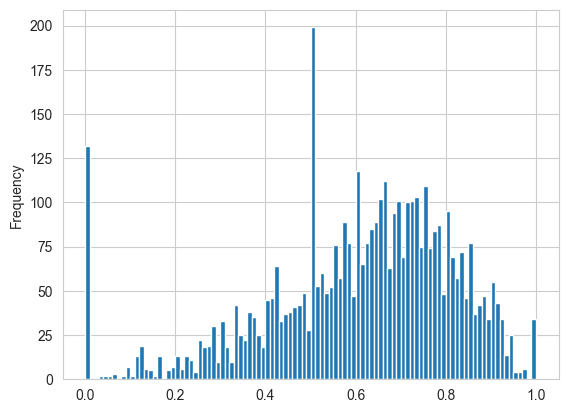

In [93]:
delay_occurences_per_route_df["Delay_frequency"].plot.hist(bins = 100)

<AxesSubplot: ylabel='Frequency'>

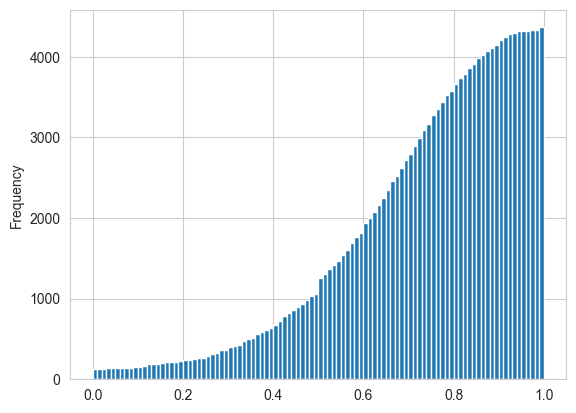

In [94]:
delay_occurences_per_route_df["Delay_frequency"].plot.hist(cumulative = True, bins = 100)

In [96]:
delay_occurences_per_route_df["Delay_frequency"].describe()

count    4367.000000
mean        0.608253
std         0.212123
min         0.000000
25%         0.500000
50%         0.642857
75%         0.758929
max         1.000000
Name: Delay_frequency, dtype: float64

Intriguing that train routes that always have delays are not considered outliers. All routes but the the train routes from the output below are more likely to experience delays. We can also see this by calculating the p value and z-score

In [97]:
def get_outlier(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    print(iqr)
    outlier = df[(df[column] > q3 + 1.5 * iqr) | (df[column] < q1 - 1.5 * iqr)]
    print(outlier)
    return outlier

df = get_outlier(delay_occurences_per_route_df, "Delay_frequency")


0.2589285714285714
      Route  Delay_frequency
66     4068         0.033333
76     4081         0.033333
88     4080         0.066667
94     4083         0.100000
305   19714         0.095238
329   19718         0.095238
358   19726         0.095238
381   19716         0.000000
382   19720         0.047619
475   19744         0.000000
1036   1522         0.000000
1082   5084         0.000000
1086   5083         0.000000
1092   5081         0.000000
1095   7496         0.066667
1097   5089         0.000000
1103   5088         0.000000
1104   5082         0.000000
1106   5085         0.000000
1108   5092         0.000000
1115   5091         0.000000
1116   5087         0.000000
1125   5093         0.000000
1131   5080         0.000000
1133   5090         0.000000
1159   5079         0.000000
1161   5086         0.000000
1251   8066         0.000000
1268   8067         0.066667
1306   4731         0.000000
1323   7655         0.000000
1327   7656         0.000000
1331   4716         0.00

In [129]:
import scipy.stats as stats
def calculate_z_score(df, column):
    df["z_score"] = (df[column] - df[column].mean()) / df[column].std(ddof=0)
    return df
def calculate_p_value(df):
    df["p_value"] = stats.norm.sf(abs(df["z_score"])) * 2
    return df

calculate_z_score(delay_occurences_per_route_df, "Delay_frequency")
pd.options.display.max_rows = 400000
calculate_p_value(delay_occurences_per_route_df)
delay_occurences_per_route_df

Route  Delay_frequency  \
0        11         0.816667   
1       116         0.380952   
2       110         0.585034   
3       112         0.435374   
4       113         0.551020   
5      2083         0.613445   
6      2092         0.714286   
7      2437         0.703448   
8      2086         0.638655   
9      2105         0.821053   
10     2090         0.658120   
11     1706         0.861538   
12     1712         0.485185   
13      111         0.578231   
14     1708         0.588015   
15     2107         0.638955   
16     2091         0.546218   
17     1941         0.570423   
18     2080         0.571429   
19     1538         0.829181   
20     1939         0.676056   
21     2089         0.649573   
22     1539         0.846975   
23     2106         0.869359   
24       17         0.814286   
25     1943         0.591549   
26     1536         0.533808   
27     1710         0.614815   
28     1940         0.759398   
29     1540         0.733096   
30     2093         0.529412   
31     1705         0.733333   
32     1532         0.741135   
33     1692         0.457143   
34     1711         0.530303   
35     2081         0.588235   
36     2439         0.837931   
37      117         0.394558   
38     2082         0.605042   
39     2104         0.686667   
40     2084         0.579832   
41     1535         0.709220   
42     1533         0.861210   
43     2438         0.737931   
44     2088         0.579832   
45     1691         0.742857   
46     1942         0.450704   
47     2440         0.662963   
48     1694         0.600000   
49     1531         0.861210   
50     2085         0.722689   
51     1709         0.681481   
52     1704         0.564655   
53     1693         0.700000   
54     1707         0.874074   
55     1537         0.704626   
56     2087         0.613445   
57     2856         0.571429   
58     1534         0.715302   
59     2464         0.290909   
60     3603         0.638710   
61     4268         0.600000   
62     3607         0.788991   
63     2860         0.197802   
64     3880         0.561224   
65     3611         0.660550   
66     4068         0.033333   
67     4085         0.200000   
68     2457         0.418182   
69     4087         0.333333   
70     2843         0.353535   
71     4265         0.639535   
72     3219         0.632258   
73     4486         0.875000   
74     2854         0.430769   
75     3883         0.602041   
76     4081         0.033333   
77     2463         0.218182   
78     3220         0.221622   
79     3608         0.692661   
80     2867         0.333333   
81     4261         0.593023   
82     4482         0.675000   
83     3610         0.665138   
84     3878         0.806122   
85     2443         0.476510   
86     4070         0.266667   
87     2866         0.417582   
88     4080         0.066667   
89     4069         0.300000   
90     4086         0.700000   
91     4485         0.607143   
92     2458         0.345455   
93     3226         0.300000   
94     4083         0.100000   
95     4084         0.233333   
96     3615         0.623853   
97     3884         0.632653   
98     2441         0.658621   
99     4487         0.750000   
100    4076         0.300000   
101    2861         0.384615   
102    3609         0.651376   
103    2844         0.606061   
104    4079         0.266667   
105    2842         0.496241   
106    4082         0.166667   
107    4264         0.557143   
108    3876         0.842857   
109    3877         0.900000   
110    3612         0.724771   
111    3882         0.795918   
112    3879         0.857143   
113    2862         0.439560   
114    4267         0.627907   
115    2855         0.292308   
116    2863         0.230769   
117    2865         0.230769   
118    4077         0.655172   
119    4262         0.642857   
120    2858         0.373626   
121    2456         0.400000   
122    4483         0.696429   
123     426         0.480000   
124   

In [132]:
delay_occurences_per_route_df.sort_values(by = ["Delay_frequency","Re"], ascending=False)

Route  Delay_frequency  \
4160   9375         1.000000   
4188   9448         1.000000   
4124   9334         1.000000   
4150   9891         1.000000   
3551   5937         1.000000   
3578   5935         1.000000   
3598   5926         1.000000   
3646   5928         1.000000   
1519   5840         1.000000   
1542   5837         1.000000   
1557   5838         1.000000   
1573   5836         1.000000   
3348   5834         1.000000   
3352   5828         1.000000   
3363   5827         1.000000   
3366   5826         1.000000   
3380   5830         1.000000   
3386   5833         1.000000   
3413   5832         1.000000   
4356   9603         1.000000   
925   19223         1.000000   
4334  19807         1.000000   
599   19901         1.000000   
741   19945         1.000000   
4339  19907         1.000000   
4342  19929         1.000000   
4343  19947         1.000000   
4348  19955         1.000000   
3872   4638         1.000000   
4036   4641         1.000000   
4353  19703         1.000000   
1032   8678         1.000000   
1067   8677         1.000000   
4211   9095         1.000000   
4207  18004         0.979167   
3666   9309         0.978947   
2987    933         0.976190   
4364  17209         0.975000   
3429    940         0.971429   
3018   9328         0.971154   
2977    913         0.967136   
234    1555         0.965517   
4156   8223         0.962963   
1690   5386         0.960526   
2516  19832         0.958621   
1252   9364         0.956140   
3732   3467         0.952381   
2399   4157         0.950980   
2653   4179         0.950000   
2671   4178         0.949495   
2346   3979         0.945055   
457    3991         0.944444   
2347   3988         0.944444   
2360   3978         0.944444   
2366   3985         0.944444   
2375   3977         0.944444   
2379   3981         0.944444   
2421   3982         0.944444   
2427   3989         0.944444   
2255   3958         0.944444   
1330   6078         0.944444   
879    2038         0.944162   
3070   6579         0.943820   
2140   3257         0.942857   
4135    884         0.942857   
4157    891         0.942857   
4093    860         0.942857   
1107   5578         0.941667   
1248   6591         0.941176   
3129   6581         0.941176   
1099   6557         0.941176   
4362  17204         0.941176   
2405   4158         0.940594   
2681   4180         0.940000   
4209  18002         0.937500   
1707   5384         0.934211   
1714   5380         0.934211   
1732   5388         0.934211   
3068   6578         0.933333   
2400   3987         0.933333   
413    3970         0.933333   
2131   3956         0.933333   
390   12157         0.933333   
488    3990         0.932584   
1293   6079         0.932203   
3331   6091         0.932203   
789    4188         0.930000   
3075   6583         0.929412   
2694   4182         0.929293   
1614   9412         0.928571   
2231   3256         0.928571   
4018   3072         0.928571   
3876   3090         0.928571   
3900   3891         0.928571   
4363  17206         0.928571   
4200   6938         0.925926   
3432   4568         0.925466   
971    3558         0.925000   
1366   6083         0.923729   
2312   1571         0.923077   
295    2187         0.923077   
318    2179         0.923077   
337    2182         0.923077   
346    2184         0.923077   
352    2188         0.923077   
362    2183         0.923077   
368    2180         0.923077   
2959   8659         0.923077   
3956  12569         0.923077   
1566    530         0.922819   
3132   6587         0.922222   
2406   3984         0.922222   
2407   3986         0.922222   
432    3967         0.922222   
2264   3957         0.922222   
3156   6062         0.922222   
1286   6090         0.922222   
1138   4656         0.922222   
1017   3567         0.921739   
2460   4165         0.921569   
793    4187         0.920000   
3136   6586         0.917647   
2095   3631         0.917431   
2082   3909         0.916667   
2931  

Maybe get the mean delay frequency per Re

In [146]:
delay_occurences_per_route_df["test"] = delay_occurences_per_route_df.groupby("Re")["Delay_frequency"].transform("mean")
delays_per_relation = delay_occurences_per_route_df[["Re", "Delay_frequency"]]
delays_per_relation["avg_delay_freq"] = delays_per_relation.groupby("Re")["Delay_frequency"].transform("mean")
delays_per_relation = delays_per_relation.drop(columns = ["Delay_frequency"]).drop_duplicates()
delays_per_relation

/var/folders/v2/875x9vcs3ylbf36njx44yk5r0000gn/T/ipykernel_37435/3250347714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays_per_relation["avg_delay_freq"] = delays_per_relation.groupby("Re")["Delay_frequency"].transform("mean")


Re  avg_delay_freq
0              ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF        0.736295
1                            IC 33: LIERS -> LUXEMBOURG        0.559335
4                            IC 33: LUXEMBOURG -> LIERS        0.536659
5                        L B10-1: AALST -> BRUSSEL-ZUID        0.637542
7            IC 18: LIEGE-SAINT-LAMBERT -> BRUSSEL-ZUID        0.732769
9                   IC 16-1: BRUSSEL-ZUID -> LUXEMBOURG        0.732007
11                 IC 14: QUIEVRAIN -> LIEGE-GUILLEMINS        0.672799
17      IC 06-1: BRUSSELS AIRPORT - ZAVENTEM -> TOURNAI        0.632818
19                          IC 03: GENK -> BLANKENBERGE        0.693255
33                           L 36: ZOTTEGEM -> KORTRIJK        0.580556
57                   L 23: ANTWERPEN-CENTRAAL -> LEUVEN        0.353461
59                              L 03: LEUVEN -> HASSELT        0.419192
60                   IC 29: GENT-SINT-PIETERS -> LANDEN        0.734452
61                      L C2-1: CHARLEROI-SUD -> LUTTRE        0.541413
62                            IC 29: DE PANNE -> LANDEN        0.670277
64                 L B10-2: BRUSSEL-ZUID -> DENDERMONDE        0.762075
66                     L 31: JURBISE -> BRAINE-LE-COMTE        0.292118
67                     L 31: BRAINE-LE-COMTE -> JURBISE        0.277750
70     IC 23-2: BRUSSELS AIRPORT - ZAVENTEM -> OOSTENDE        0.548579
71          L C2-1: CHARLEROI-SUD -> LA LOUVIERE-CENTRE        0.601017
72                      IC 26: KORTRIJK -> SINT-NIKLAAS        0.606880
73                        L 26: LA LOUVIERE-SUD -> MONS        0.672656
93                      IC 26: SINT-NIKLAAS -> KORTRIJK        0.660663
123                      IC 12: WELKENRAEDT -> KORTRIJK        0.530972
131                         L B5-2: MECHELEN -> EDINGEN        0.724368
142                      IC 12: KORTRIJK -> WELKENRAEDT        0.583702
151                       L C4: COUVIN -> CHARLEROI-SUD        0.616349
152                             L 03: HASSELT -> LEUVEN        0.422967
153                       L C4: CHARLEROI-SUD -> COUVIN        0.697547
154              L B1-2: NIVELLES -> ANTWERPEN-CENTRAAL        0.753157
155                  IC 21: GENT-SINT-PIETERS -> LEUVEN        0.583250
157       IC 09: ANTWERPEN-CENTRAAL -> LIEGE-GUILLEMINS        0.407411
158                IC 14: LIEGE-GUILLEMINS -> QUIEVRAIN        0.664080
161                  IC 29: LANDEN -> GENT-SINT-PIETERS        0.727511
162                  IC 21: LEUVEN -> GENT-SINT-PIETERS        0.554083
164                   L B2-1: BRAINE-LE-COMTE -> LEUVEN        0.689290
167                   L B1-2: NIVELLES -> BRUSSEL-NOORD        0.749545
168                     L C2-1: LUTTRE -> CHARLEROI-SUD        0.407314
172                 IC 16-1: LUXEMBOURG -> BRUSSEL-ZUID        0.805637
188                           L B6: AALST -> SCHAARBEEK        0.766166
193                  L 23: LEUVEN -> ANTWERPEN-CENTRAAL        0.427940
199        IC 17: BRUSSELS AIRPORT - ZAVENTEM -> DINANT        0.730131
229                           IC 29: LANDEN -> DE PANNE        0.555556
276                       IC 17: BRUSSEL-ZUID -> DINANT        0.708333
290                       IC 05: CHARLEROI-SUD -> ESSEN        0.581331
295                            L B4: AALST -> VILVOORDE        0.914103
298        IC 17: DINANT -> BRUSSELS AIRPORT - ZAVENTEM        0.809655
299              L B1-1: ANTWERPEN-CENTRAAL -> NIVELLES        0.770013
301       IC 09: LIEGE-GUILLEMINS -> ANTWERPEN-CENTRAAL        0.382924
303                 IC 04-2: LILLE FLANDRES -> KORTRIJK        0.326667
305                 IC 04-2: KORTRIJK -> LILLE FLANDRES        0.102309
314                              L A2-1: PUURS -> ESSEN        0.501368
315                       IC 05: ESSEN -> CHARLEROI-SUD        0.668482
331          L B1-1: BRUSSEL-ZUID -> ANTWERPEN-CENTRAAL        0.759908
332                IC 20: GENT-SINT-PIETERS -> TONGEREN        0.586469
384                  

In [151]:
delays_per_relation

avg_delay_freq
count      246.000000
mean         0.621580
std          0.167540
min          0.000000
25%          0.541945
50%          0.647808
75%          0.733192
max          0.953846

In [153]:
get_outlier(delays_per_relation, "avg_delay_freq")


0.1912476654968135
                                       Re  avg_delay_freq
305   IC 04-2: KORTRIJK -> LILLE FLANDRES        0.102309
886        IC 42: QUEVY-FRONTIERE -> MONS        0.221429
1082            L 42: ATHUS -> LUXEMBOURG        0.000000
1306            L 41: ATHUS -> LUXEMBOURG        0.000000
1404            L 12: ARLON -> LUXEMBOURG        0.000000
1595            L 43: ARLON -> LUXEMBOURG        0.000000
1684         IC 16-2: ARLON -> LUXEMBOURG        0.000000
1787         IC 16-2: LUXEMBOURG -> ARLON        0.226471


Re  avg_delay_freq
305   IC 04-2: KORTRIJK -> LILLE FLANDRES        0.102309
886        IC 42: QUEVY-FRONTIERE -> MONS        0.221429
1082            L 42: ATHUS -> LUXEMBOURG        0.000000
1306            L 41: ATHUS -> LUXEMBOURG        0.000000
1404            L 12: ARLON -> LUXEMBOURG        0.000000
1595            L 43: ARLON -> LUXEMBOURG        0.000000
1684         IC 16-2: ARLON -> LUXEMBOURG        0.000000
1787         IC 16-2: LUXEMBOURG -> ARLON        0.226471

<AxesSubplot: ylabel='Frequency'>

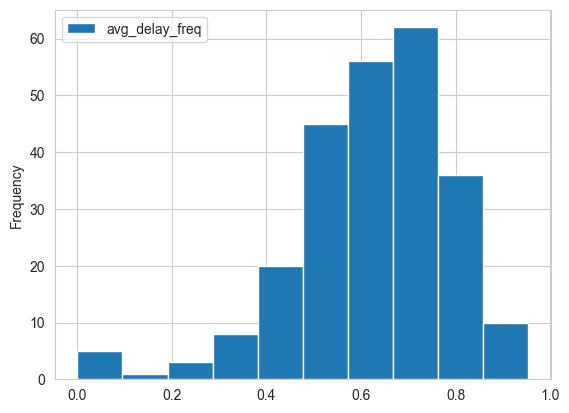

In [150]:
delays_per_relation.plot.hist()

In [133]:
routes.get(17209)

Unnamed: 0 Date of departure  Train number Relation Railway operators  \
71790       71790        2020-09-25         17209    EXTRA         SNCB/NMBS   
71793       71793        2020-09-25         17209    EXTRA         SNCB/NMBS   
71796       71796        2020-09-25         17209    EXTRA         SNCB/NMBS   
71907       71907        2020-09-25         17209    EXTRA         SNCB/NMBS   
72491       72491        2020-09-25         17209    EXTRA         SNCB/NMBS   
71909       71909        2020-09-25         17209    EXTRA         SNCB/NMBS   
71799       71799        2020-09-25         17209    EXTRA         SNCB/NMBS   
72492       72492        2020-09-25         17209    EXTRA         SNCB/NMBS   
71802       71802        2020-09-25         17209    EXTRA         SNCB/NMBS   
71911       71911        2020-09-25         17209    EXTRA         SNCB/NMBS   
71913       71913        2020-09-25         17209    EXTRA         SNCB/NMBS   
72493       72493        2020-09-25         17209    EXTRA         SNCB/NMBS   
72494       72494        2020-09-25         17209    EXTRA         SNCB/NMBS   
71915       71915        2020-09-25         17209    EXTRA         SNCB/NMBS   
71917       71917        2020-09-25         17209    EXTRA         SNCB/NMBS   
72495       72495        2020-09-25         17209    EXTRA         SNCB/NMBS   
72496       72496        2020-09-25         17209    EXTRA         SNCB/NMBS   
71805       71805        2020-09-25         17209    EXTRA         SNCB/NMBS   
72497       72497        2020-09-25         17209    EXTRA         SNCB/NMBS   
71808       71808        2020-09-25         17209    EXTRA         SNCB/NMBS   
72498       72498        2020-09-25         17209    EXTRA         SNCB/NMBS   
71811       71811        2020-09-25         17209    EXTRA         SNCB/NMBS   
71814       71814        2020-09-25         17209    EXTRA         SNCB/NMBS   
72499       72499        2020-09-25         17209    EXTRA         SNCB/NMBS   
71919       71919        2020-09-25         17209    EXTRA         SNCB/NMBS   
71817       71817        2020-09-25         17209    EXTRA         SNCB/NMBS   
72500       72500        2020-09-25         17209    EXTRA         SNCB/NMBS   
71921       71921        2020-09-25         17209    EXTRA         SNCB/NMBS   
72501       72501        2020-09-25         17209    EXTRA         SNCB/NMBS   
71923       71923        2020-09-25         17209    EXTRA         SNCB/NMBS   
72503       72503        2020-09-25         17209    EXTRA         SNCB/NMBS   
72502       72502        2020-09-25         17209    EXTRA         SNCB/NMBS   
72504       72504        2020-09-25         17209    EXTRA         SNCB/NMBS   
72505       72505        2020-09-25         17209    EXTRA         SNCB/NMBS   
71925       71925        2020-09-25         17209    EXTRA         SNCB/NMBS   
71927       71927        2020-09-25         17209    EXTRA         SNCB/NMBS   
71929       71929        2020-09-25         17209    EXTRA         SNCB/NMBS   
71931       71931        2020-09-25         17209    EXTRA         SNCB/NMBS   
71933       71933        2020-09-25         17209    EXTRA         SNCB/NMBS   
71820       71820        2020-09-25         17209    EXTRA         SNCB/NMBS   

      Railway of departure Time of real arrival Time of real departure  \
71790                   75                  NaT    2022-10-29 20:16:29   
71793                   75  2022-10-29 20:23:37    2022-10-29 20:23:37   
71796                   75  2022-10-29 20:28:00    2022-10-29 20:31:45   
71907                   89  2022-10-29 20:38:49    2022-10-29 20:38:49   
72491                   89  2022-10-29 20:42:49    2022-10-29 20:42:49   
71909                   89  2022-10-29 20:52:38    2022-10-29 20:52:38   
71799                   89  2022-10-29 20:58:22    2022-10-29 20:58:22   
72492                   89  2022-10-29 20:59:24    2022-10-29 20:59:24   
71802                   89  2022-10-29 21:03:46    2022-10-2

In [99]:
delay_occurences_per_route_df[delay_occurences_per_route_df["p_value"] <0.05]

Route  Delay_frequency   z_score   p_value
66     4068         0.033333 -2.710627  0.006716
76     4081         0.033333 -2.710627  0.006716
88     4080         0.066667 -2.553467  0.010666
94     4083         0.100000 -2.396308  0.016561
106    4082         0.166667 -2.081988  0.037344
305   19714         0.095238 -2.418759  0.015574
324   19719         0.133333 -2.239148  0.025146
329   19718         0.095238 -2.418759  0.015574
358   19726         0.095238 -2.418759  0.015574
381   19716         0.000000 -2.867787  0.004134
382   19720         0.047619 -2.643273  0.008211
475   19744         0.000000 -2.867787  0.004134
518   19743         0.142857 -2.194245  0.028218
654   19915         0.166667 -2.081988  0.037344
921    4443         0.185714 -1.992183  0.046351
1036   1522         0.000000 -2.867787  0.004134
1082   5084         0.000000 -2.867787  0.004134
1086   5083         0.000000 -2.867787  0.004134
1092   5081         0.000000 -2.867787  0.004134
1095   7496         0.066667 -2.553467  0.010666
1097   5089         0.000000 -2.867787  0.004134
1103   5088         0.000000 -2.867787  0.004134
1104   5082         0.000000 -2.867787  0.004134
1106   5085         0.000000 -2.867787  0.004134
1108   5092         0.000000 -2.867787  0.004134
1115   5091         0.000000 -2.867787  0.004134
1116   5087         0.000000 -2.867787  0.004134
1125   5093         0.000000 -2.867787  0.004134
1131   5080         0.000000 -2.867787  0.004134
1133   5090         0.000000 -2.867787  0.004134
1159   5079         0.000000 -2.867787  0.004134
1161   5086         0.000000 -2.867787  0.004134
1251   8066         0.000000 -2.867787  0.004134
1268   8067         0.066667 -2.553467  0.010666
1306   4731         0.000000 -2.867787  0.004134
1323   7655         0.000000 -2.867787  0.004134
1327   7656         0.000000 -2.867787  0.004134
1331   4716         0.000000 -2.867787  0.004134
1335   5181         0.138462 -2.214970  0.026762
1336   4730         0.000000 -2.867787  0.004134
1364   7657         0.000000 -2.867787  0.004134
1393   4711         0.166667 -2.081988  0.037344
1404   5809         0.000000 -2.867787  0.004134
1412   5808         0.000000 -2.867787  0.004134
1424   5807         0.000000 -2.867787  0.004134
1434   5811         0.000000 -2.867787  0.004134
1440   4748         0.000000 -2.867787  0.004134
1453   5806         0.000000 -2.867787  0.004134
1595   5918         0.000000 -2.867787  0.004134
1603   5917         0.000000 -2.867787  0.004134
1613   5905         0.000000 -2.867787  0.004134
1615   5907         0.000000 -2.867787  0.004134
1621   5916         0.000000 -2.867787  0.004134
1625   5909         0.000000 -2.867787  0.004134
1638   8487         0.083333 -2.474888  0.013328
1640   5908         0.000000 -2.867787  0.004134
1642   5912         0.000000 -2.867787  0.004134
1651   5904         0.000000 -2.867787  0.004134
1662   5906         0.000000 -2.867787  0.004134
1684   4607         0.000000 -2.867787  0.004134
1686   4609         0.000000 -2.867787  0.004134
1689   4615         0.000000 -2.867787  0.004134
1711   4608         0.000000 -2.867787  0.004134
1738   8641         0.000000 -2.867787  0.004134
1787   4628         0.000000 -2.867787  0.004134
1846   4629         0.000000 -2.867787  0.004134
1856   4063         0.133333 -2.239148  0.025146
1869   4065         0.000000 -2.867787  0.004134
1900   4066         0.166667 -2.081988  0.037344
1999   4064         0.166667 -2.081988  0.037344
2121   4089         0.100000 -2.396308  0.016561
2161   2931         0.192000 -1.962547  0.049699
2277  19737         0.190476 -1.969732  0.048869
2280  19736         0.133333 -2.239148  0.025146
2285  19728         0.095238 -2.418759  0.015574
2287  19730         0.142857 -2.194245  0.028218
2301  19734         0.190476 -1.969732  0.048869
2311  19741         0.111111 -2.343921  0.019082
2313  19735         0.095238 -2.418759  0.015574
2316  19739         0.047619 -2.643273  0.008211
2342  19742         0.133333 -2.23914

Timestamp('2020-09-26 00:00:00')